# Goal:- We need to Predict Score/ Marks while a student is spending 9.25hrs every day in studying.

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=15,8
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# fetching dataset
given_url='http://bit.ly/w-data'
data=pd.read_csv(given_url)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Doing Exploratory Data Analysis(EDA)

In [33]:
#no null values are present
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
corelation=data.corr()

In [7]:
corelation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

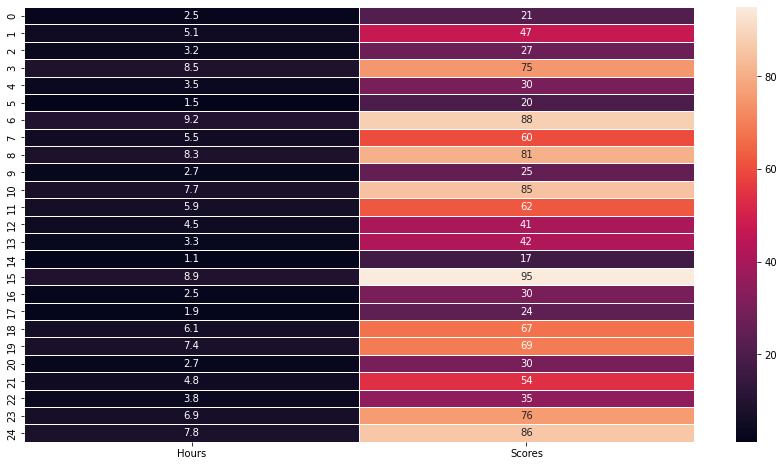

In [8]:
sns.heatmap(data,annot=True,linewidths=0.9,linecolor='w')

Text(0, 0.5, 'Marks')

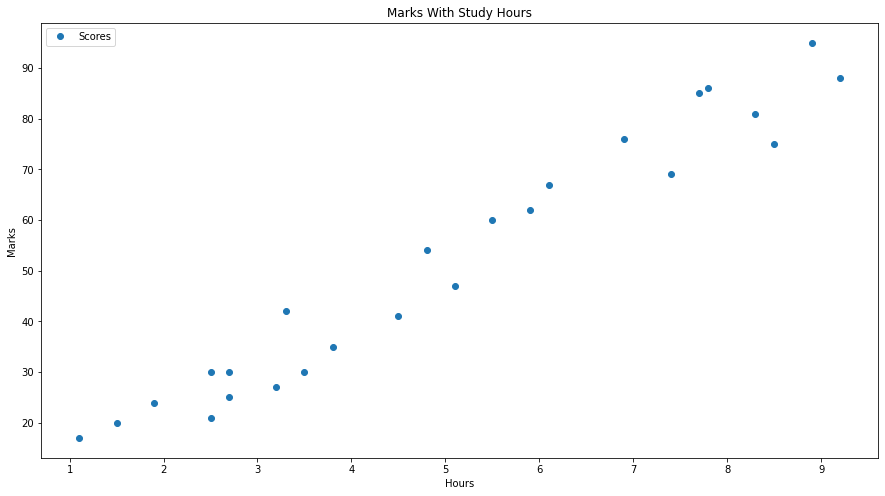

In [9]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Marks With Study Hours')
plt.xlabel('Hours')
plt.ylabel('Marks')

In [10]:
X=data.iloc[:,:-1]
Y=data.iloc[:,1]

In [11]:
X.values

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
Y.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting Data Before Doing Linear Regression Model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
x_train.shape

(20, 1)

In [16]:
x_test.shape

(5, 1)

In [17]:
y_train.shape

(20,)

In [18]:
y_test.shape

(5,)

# Importing Library For Doing Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
lr.coef_

array([9.68207815])

In [23]:
lr.intercept_

2.826892353899737

In [24]:
straight_line=lr.coef_ * X + lr.intercept_

In [25]:
straight_line

,Hours
0,27.032088
1,52.205491
2,33.809542
3,85.124557
4,36.714166
5,17.350010
6,91.902011
7,56.078322
8,83.188141
9,28.968503


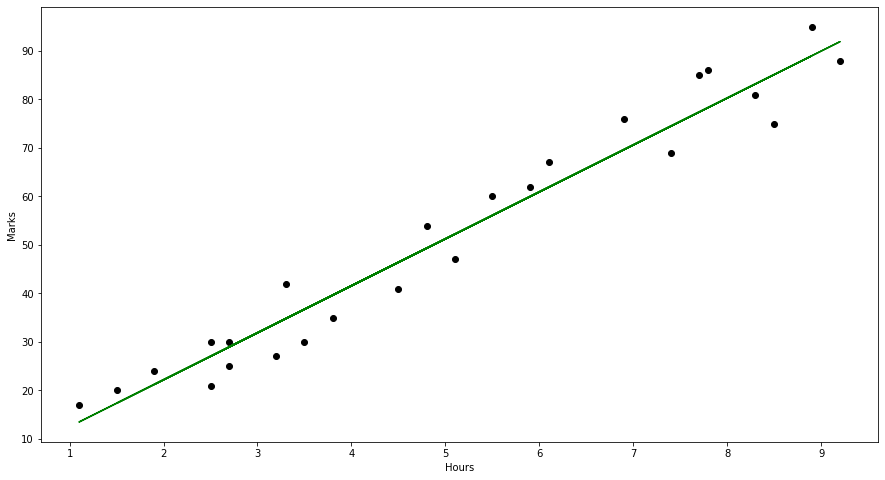

In [26]:
plt.scatter(X,Y,color='black')
plt.plot(X,straight_line,color='green')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

In [27]:
y_prediction=lr.predict(x_test)

In [28]:
y_prediction

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [29]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test,y_prediction)

3.9207511902099244

# Predicting Marks When A student Studies 9.25 Hrs Per Day

In [35]:
given_hours = 9.25
predicted_score=lr.predict([[given_hours]])
predicted_score

array([92.38611528])